# Project Title: Olympics Data Analysis

# Step 1: Data Preparation

In [233]:
# Import necessary libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# load the dataset
df = pd.read_csv('Summer Olympic medals 1976 to 2008.csv')

In [237]:
# Displaying the first 5 rows of the dataset
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [239]:
# Summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [243]:
# Summary statistics for all columns
df.describe(include='all')

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316.000000,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,NaN,28,41,293,11337,2,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,817,16,9388,1992,1992,8817,5258
mean,NaN,1993.620789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
# Number of (rows ,columns)
df.shape

(15433, 11)

# Step 2: Data Cleaning

In [247]:
# Check for missing values
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [249]:
# Displaying Null values in percentage
df.isnull().sum()/df.shape[0]*100

City            0.758116
Year            0.758116
Sport           0.758116
Discipline      0.758116
Event           0.758116
Athlete         0.758116
Gender          0.758116
Country_Code    0.758116
Country         0.758116
Event_gender    0.758116
Medal           0.758116
dtype: float64

In [251]:
df = df.dropna()

In [253]:
df.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [255]:
df.shape

(15316, 11)

In [257]:
# Fix the datatypes of the columns
df = df.astype({'Year':'int'})

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int32 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int32(1), object(10)
memory usage: 1.3+ MB


In [261]:
df['Medal'].value_counts()

Medal
Bronze    5258
Gold      5042
Silver    5016
Name: count, dtype: int64

# Step 3: Exploratory Data Analysis (EDA)

# 3.1 Total medals won by each country

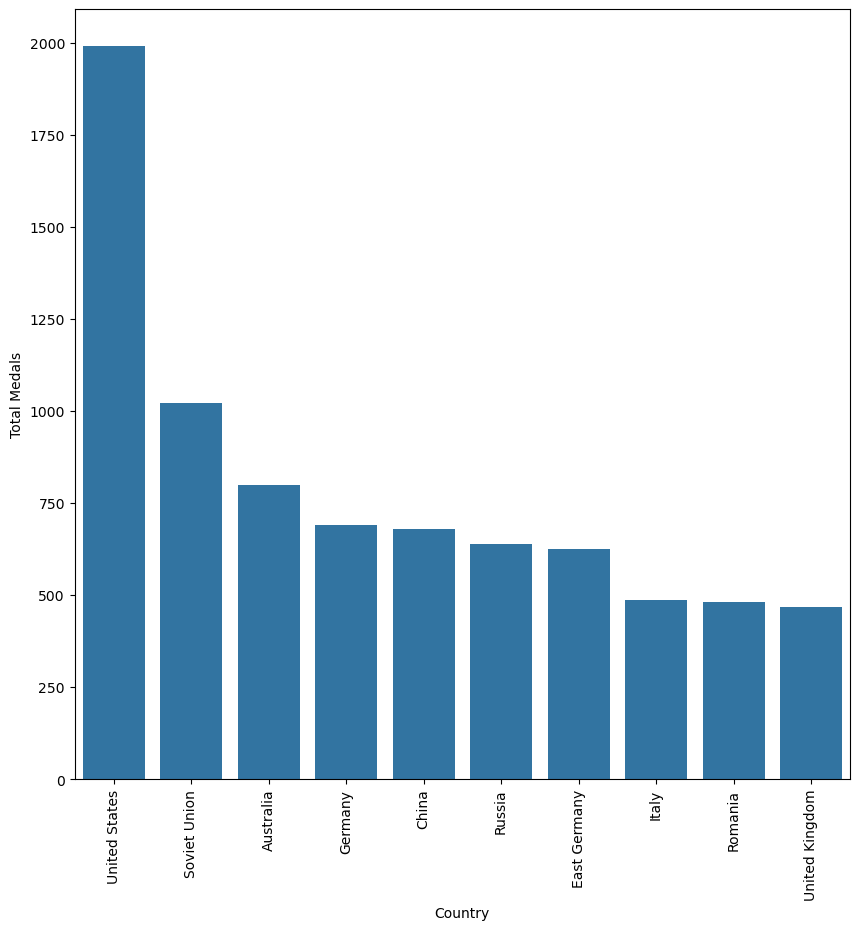

In [263]:
# Total medals won by each country
medals_by_country = df.groupby('Country')['Medal'].count().sort_values(ascending = False)

# Creating a new Dataset df1, which has top 10 countries by medals
df1 = pd.DataFrame(medals_by_country.head(10))

# Plotting the top 10 Countries by medal
plt.figure(figsize=(10,10))
sns.barplot(df1.Medal)
plt.ylabel('Total Medals')
plt.xticks(rotation = 90)
plt.show()

# 3.2 Medals Won Over the Years

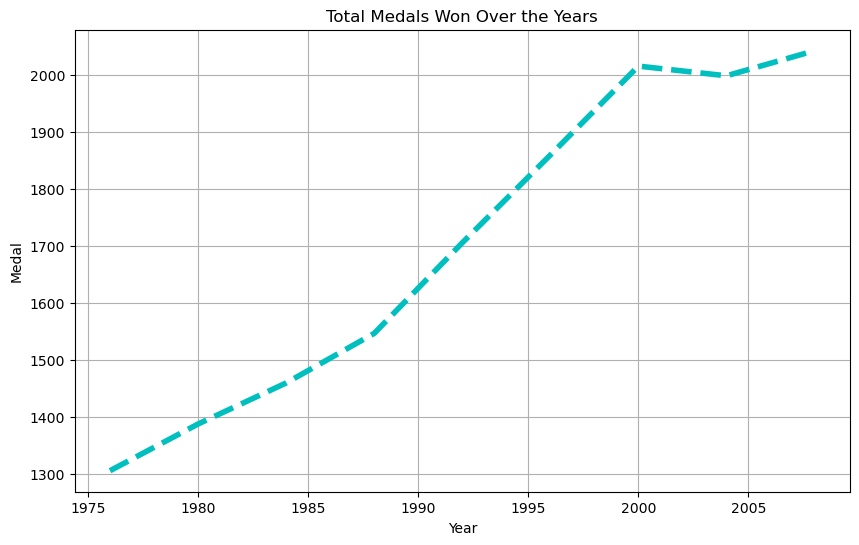

In [265]:
# Grouping by Year and counting the medals won
medals_over_years = df.groupby('Year')['Medal'].count()

# Plotting the Medals Won over the years
plt.figure(figsize=(10,6))
sns.lineplot(medals_over_years,linestyle = '--',linewidth = 4,color = 'c')
plt.title("Total Medals Won Over the Years")
plt.grid()
plt.show()

In [267]:
medals_over_years

Year
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
Name: Medal, dtype: int64

# 3.3 Gender Distribution in Events

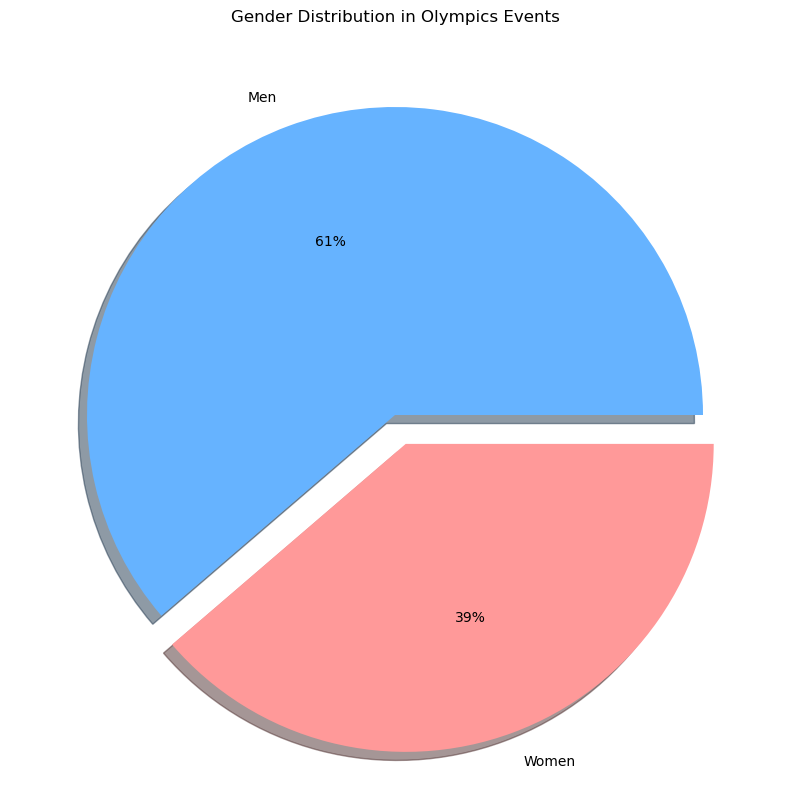

In [269]:
# Gender distribution in events
gender_distribution = df['Gender'].value_counts()

# Plotting gender distribution
plt.figure(figsize=(10,10))
gender_distribution.plot(kind='pie', shadow = True, radius = 1, autopct='%0.0f%%',colors=['#66b3ff','#ff9999'], explode=[0, 0.1])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

In [271]:
gender_distribution

Gender
Men      9388
Women    5928
Name: count, dtype: int64

# 3.4 Top Athletes with Most Medals

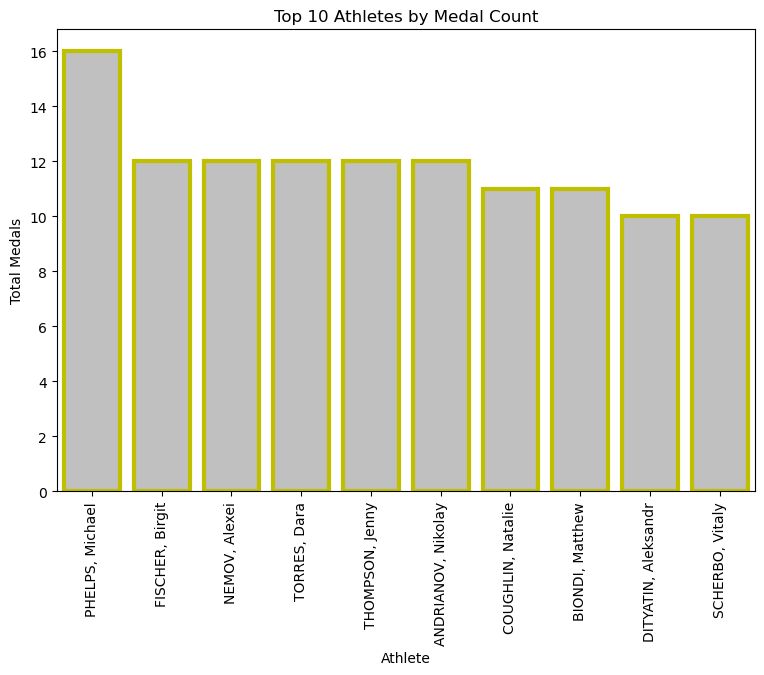

In [273]:
# Group by Athlete and count the number of medals
athlete_medal_count = df.groupby('Athlete')["Medal"].count().sort_values(ascending = False)

# Creating new Dataset df2, which has top 10 athletes with most medals
df2 = pd.DataFrame(athlete_medal_count.head(10))

# Plotting the top 10 athletes with most medals
plt.figure(figsize=(9,6))
sns.barplot(df2.Medal,color = 'silver',edgecolor = 'y',linewidth = 3)
plt.title("Top 10 Athletes by Medal Count")
plt.xticks(rotation = 90)
plt.ylabel('Total Medals')
plt.show()

# Q1. Which city hosted maximum number of olympics

In [275]:
q1_df = df[["City", 'Year']]
q1_df = q1_df.drop_duplicates('Year')
q1_df

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992
7519,Atlanta,1996
9378,Sydney,2000
11393,Athens,2004
13391,Beijing,2008


Conclusion: From 1976 - 2008,No city has hosted Olympics twice

# Q2. Which city hosted most events.

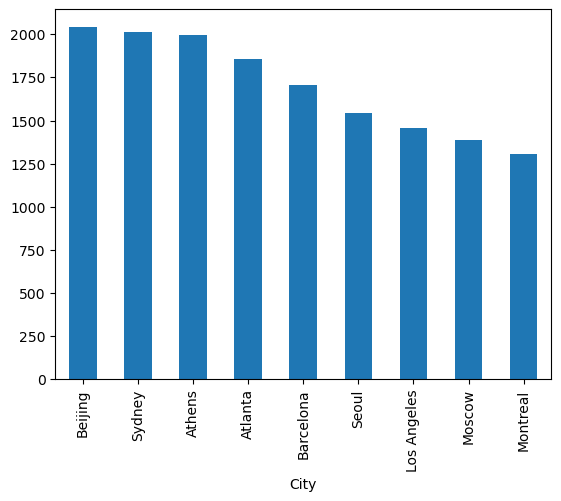

In [277]:
q2_df = df['City'].value_counts()
q2_df.plot(kind = 'bar')
plt.show()

Conclusion : Beijing has the hosted the biggest Olympics since 1976 till 2008. Followed by
Sydney and Athens.

# Q3. Understand the events themselves.
logic : Focus on Sport, Discipline and Event. Use groupby and see how many kinds
and variations are there.

In [279]:
print(df[['Country_Code']])

      Country_Code
0              GDR
1              URS
2              USA
3              ITA
4              USA
5              USA
6              URS
7              USA
8              ITA
9              URS
10             SWE
11             USA
12             USA
13             USA
14             GDR
15             AUS
16             URS
17             GDR
18             USA
19             GDR
20             CAN
21             USA
22             USA
23             USA
24             CAN
25             USA
26             USA
27             GDR
28             USA
29             USA
30             FRG
31             NED
32             GBR
33             USA
34             GDR
35             CAN
36             URS
37             USA
38             CAN
39             URS
40             CAN
41             USA
42             USA
43             URS
44             GDR
45             CAN
46             URS
47             USA
48             URS
49             GBR
50             GBR
51          

In [281]:
q3_data = df[['Sport', 'Discipline','Event']].drop_duplicates()
print("Total number of unique events are held so far are :",len(q3_data))

Total number of unique events are held so far are : 334


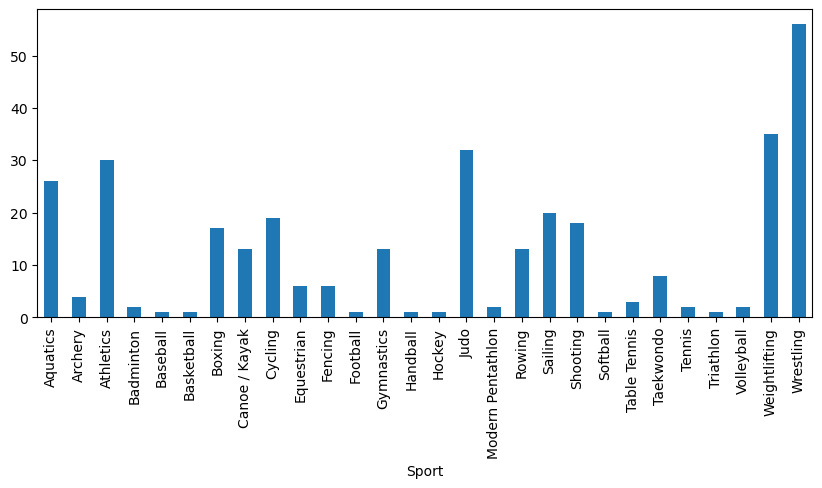

In [283]:
q3_data = q3_data.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (10,4))
q3_data.plot.bar(x = 'Sport', y = 'Count')
plt.show()

Conclusion : Sports with most events are Wrestling, Weightlifting and Judo. Total number of
unique events are held: 334

In [ ]:
# Q4. Which Athlete has won most medal from given period?

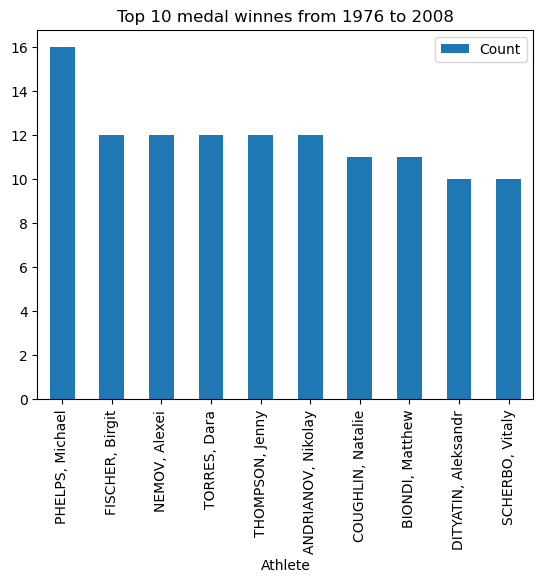

In [285]:
q4_df = df.groupby(['Athlete'])['Athlete'].count().reset_index(name='Count').sort_values(ascending=False, by=['Count'])
q4_df.head(10).plot.bar(x = 'Athlete' , y ='Count')
plt.title('Top 10 medal winnes from 1976 to 2008')
plt.show()

Conclusion : Michael Phelps won 16 mdeal durin 1976 to 2008

# Q5. Put some light on gender ratio in winning teams?

Gender
Men      9388
Women    5928
Name: count, dtype: int64


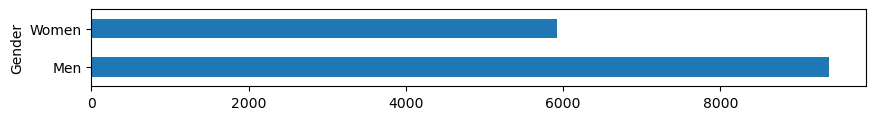

In [287]:
q5_df = df['Gender'].value_counts()
print(q5_df)
plt.figure(figsize = (10,1))
q5_df.plot.barh()
plt.show()

There are some events that are made only for Men!

In [291]:
q5_data = df[['Event', 'Gender']]
q5_data = q5_data.groupby(['Event','Gender'])['Gender']
q5_data.size() # Displays total events with gender specification
#pd.set_option('display.max_rows',None)
gender_specified_events = pd.DataFrame(q5_data.size())

In [293]:
gender_specified_events

,,Gender
Event,Gender,
+ 100kg (heavyweight),Men,16
+ 100kg (super heavyweight),Men,18
+ 105kg,Men,9
"+ 108kg, total (super heavyweight)",Men,3
"+ 110kg, total (super heavyweight)",Men,15
+ 67 kg,Women,10
+ 72kg (heavyweight),Women,8
+ 75kg,Women,9
+ 78kg (heavyweight),Women,12


# Q6. Which country has won most medal and how many in each year?

In [359]:
q6_df = df.groupby(['Country'])['Medal'].count().reset_index(name='Count').sort_values(ascending=False, by=['Count'])
q6_df

,Country,Count
117,United States,1992
95,Soviet Union,1021
4,Australia,798
38,Germany,691
18,China,679
87,Russia,638
29,East Germany,626
51,Italy,486
86,Romania,482
116,United Kingdom,467


Conclusion: United States has won most medal during the period of 1976 t0 2008

In [362]:
q6_df_year = df.groupby(['Year', 'Country','Medal'])['Country'].count().reset_index(name = 'Count')

In [364]:
q6_df_year

,Year,Country,Medal,Count
0,1976,Australia,Bronze,8
1,1976,Australia,Silver,16
2,1976,Austria,Bronze,1
3,1976,Belgium,Bronze,6
4,1976,Belgium,Silver,3
5,1976,Bermuda*,Bronze,1
6,1976,Brazil,Bronze,3
7,1976,Bulgaria,Bronze,18
8,1976,Bulgaria,Gold,8
9,1976,Bulgaria,Silver,13


In [366]:
q6_df_year['Medal'] = pd.Categorical(q6_df_year['Medal'],categories=['Gold', 'Silver', 'Bronze'], ordered=True)

In [374]:
sorted_df = q6_df_year.sort_values(by='Medal')
sorted_df # Sorting the DataFrame based on the Medal column (ordered by Gold > Silver > Bronze)

,Year,Country,Medal,Count
285,1988,China,Gold,6
827,2000,Switzerland,Gold,1
349,1988,Soviet Union,Gold,134
832,2000,Thailand,Gold,1
345,1988,Romania,Gold,8
343,1988,Portugal,Gold,1
836,2000,Turkey,Gold,3
341,1988,Poland,Gold,2
838,2000,Ukraine,Gold,3
841,2000,United Kingdom,Gold,22


In [376]:
q6_df_year = q6_df_year.sort_values(ascending = [True, True, True],by = ['Year', 'Country','Medal'])
q6_df_year

,Year,Country,Medal,Count
1,1976,Australia,Silver,16
0,1976,Australia,Bronze,8
2,1976,Austria,Bronze,1
4,1976,Belgium,Silver,3
3,1976,Belgium,Bronze,6
5,1976,Bermuda*,Bronze,1
6,1976,Brazil,Bronze,3
8,1976,Bulgaria,Gold,8
9,1976,Bulgaria,Silver,13
7,1976,Bulgaria,Bronze,18


In [378]:
q6_df_year = q6_df_year.pivot( index = ['Year','Country'], columns = ['Medal'], values = ['Count']).reset_index()
q6_df_year

Year                                  Country  Count              
Medal                                                  Gold Silver Bronze
0      1976                                Australia    NaN   16.0    8.0
1      1976                                  Austria    NaN    NaN    1.0
2      1976                                  Belgium    NaN    3.0    6.0
3      1976                                 Bermuda*    NaN    NaN    1.0
4      1976                                   Brazil    NaN    NaN    3.0
5      1976                                 Bulgaria    8.0   13.0   18.0
6      1976                                   Canada    NaN    8.0   12.0
7      1976                                     Cuba    6.0    4.0   14.0
8      1976                           Czechoslovakia    2.0    4.0    9.0
9      1976                                  Denmark    3.0    NaN    5.0
10     1976                             East Germany   99.0   51.0   42.0
11     1976                                  Finland    4.0    2.0    NaN
12     1976                                   France    5.0    7.0    8.0
13     1976                                  Hungary   14.0    6.0   35.0
14     1976                                     Iran    NaN    1.0    1.0
15     1976                                    Italy    2.0   25.0    4.0
16     1976                                  Jamaica    1.0    1.0    NaN
17     1976                                    Japan   25.0    6.0   10.0
18     1976                             Korea, North    1.0    1.0    NaN
19     1976                             Korea, South    1.0    1.0   15.0
20     1976                                   Mexico    1.0    NaN    1.0
21     1976                                 Mongolia    NaN    1.0    NaN
22     1976                              Netherlands    NaN    2.0   13.0
23     1976                              New Zealand   17.0    1.0    9.0
24     1976                                   Norway    2.0    4.0    NaN
25     1976                                 Pakistan    NaN    NaN   16.0
26     1976                                   Poland   18.0   29.0   26.0
27     1976                                 Portugal    NaN    2.0    NaN
28     1976                             Puerto Rico*    NaN    NaN    1.0
29     1976                                  Romania    4.0   28.0   23.0
30     1976                             Soviet Union  113.0   93.0   79.0
31     1976                                    Spain    NaN    6.0    NaN
32     1976                                   Sweden    9.0    1.0    NaN
33     1976                              Switzerland    1.0    3.0    6.0
34     1976                                 Thailand    NaN    NaN    1.0
35     1976                      Trinidad and Tobago    1.0    NaN    NaN
36     1976                           United Kingdom    6.0   15.0   11.0
37     1976                            United States   63.0   56.0   36.0
38     1976                                Venezuela    NaN    1.0    NaN
39     1976                             West Germany   21.0   24.0   30.0
40     1976                               Yugoslavia    2.0   14.0    3.0
41     1980                                Australia    5.0    2.0    5.0
42     1980                                  Austria    1.0    3.0    1.0
43     1980                                  Belgium    1.0    NaN    NaN
44     1980                                   Brazil    4.0    NaN    5.0
45     1980                                 Bulgaria    8.0   46.0   40.0
46     1980                                     Cuba    8.0    7.0    5.0
47     1980                           Czechoslovakia   18.0   18.0   16.0
48     1980                                  Denmark    4.0    2.0    2.0
49     1980                             East Germany  112.0   87.0   61.0
50     1980                                 Ethiopia    2.0    NaN    2.0
51     1980                                  Finland    3.0    1.0    5.0
52     1980

In [384]:
q6_df_year = q6_df_year.replace(ny.nan, 0)
q6_df_year

Year                                  Country  Count              
Medal                                                  Gold Silver Bronze
0      1976                                Australia    0.0   16.0    8.0
1      1976                                  Austria    0.0    0.0    1.0
2      1976                                  Belgium    0.0    3.0    6.0
3      1976                                 Bermuda*    0.0    0.0    1.0
4      1976                                   Brazil    0.0    0.0    3.0
5      1976                                 Bulgaria    8.0   13.0   18.0
6      1976                                   Canada    0.0    8.0   12.0
7      1976                                     Cuba    6.0    4.0   14.0
8      1976                           Czechoslovakia    2.0    4.0    9.0
9      1976                                  Denmark    3.0    0.0    5.0
10     1976                             East Germany   99.0   51.0   42.0
11     1976                                  Finland    4.0    2.0    0.0
12     1976                                   France    5.0    7.0    8.0
13     1976                                  Hungary   14.0    6.0   35.0
14     1976                                     Iran    0.0    1.0    1.0
15     1976                                    Italy    2.0   25.0    4.0
16     1976                                  Jamaica    1.0    1.0    0.0
17     1976                                    Japan   25.0    6.0   10.0
18     1976                             Korea, North    1.0    1.0    0.0
19     1976                             Korea, South    1.0    1.0   15.0
20     1976                                   Mexico    1.0    0.0    1.0
21     1976                                 Mongolia    0.0    1.0    0.0
22     1976                              Netherlands    0.0    2.0   13.0
23     1976                              New Zealand   17.0    1.0    9.0
24     1976                                   Norway    2.0    4.0    0.0
25     1976                                 Pakistan    0.0    0.0   16.0
26     1976                                   Poland   18.0   29.0   26.0
27     1976                                 Portugal    0.0    2.0    0.0
28     1976                             Puerto Rico*    0.0    0.0    1.0
29     1976                                  Romania    4.0   28.0   23.0
30     1976                             Soviet Union  113.0   93.0   79.0
31     1976                                    Spain    0.0    6.0    0.0
32     1976                                   Sweden    9.0    1.0    0.0
33     1976                              Switzerland    1.0    3.0    6.0
34     1976                                 Thailand    0.0    0.0    1.0
35     1976                      Trinidad and Tobago    1.0    0.0    0.0
36     1976                           United Kingdom    6.0   15.0   11.0
37     1976                            United States   63.0   56.0   36.0
38     1976                                Venezuela    0.0    1.0    0.0
39     1976                             West Germany   21.0   24.0   30.0
40     1976                               Yugoslavia    2.0   14.0    3.0
41     1980                                Australia    5.0    2.0    5.0
42     1980                                  Austria    1.0    3.0    1.0
43     1980                                  Belgium    1.0    0.0    0.0
44     1980                                   Brazil    4.0    0.0    5.0
45     1980                                 Bulgaria    8.0   46.0   40.0
46     1980                                     Cuba    8.0    7.0    5.0
47     1980                           Czechoslovakia   18.0   18.0   16.0
48     1980                                  Denmark    4.0    2.0    2.0
49     1980                             East Germany  112.0   87.0   61.0
50     1980                                 Ethiopia    2.0    0.0    2.0
51     1980                                  Finland    3.0    1.0    5.0
52     1980

In [386]:
q6_df_year['Sum'] = q6_df_year['Count', 'Bronze'] + q6_df_year['Count','Gold'] + q6_df_year['Count','Silver']
q6_df_year

Year                                  Country  Count                \
Medal                                                  Gold Silver Bronze   
0      1976                                Australia    0.0   16.0    8.0   
1      1976                                  Austria    0.0    0.0    1.0   
2      1976                                  Belgium    0.0    3.0    6.0   
3      1976                                 Bermuda*    0.0    0.0    1.0   
4      1976                                   Brazil    0.0    0.0    3.0   
5      1976                                 Bulgaria    8.0   13.0   18.0   
6      1976                                   Canada    0.0    8.0   12.0   
7      1976                                     Cuba    6.0    4.0   14.0   
8      1976                           Czechoslovakia    2.0    4.0    9.0   
9      1976                                  Denmark    3.0    0.0    5.0   
10     1976                             East Germany   99.0   51.0   42.0   
11     1976                                  Finland    4.0    2.0    0.0   
12     1976                                   France    5.0    7.0    8.0   
13     1976                                  Hungary   14.0    6.0   35.0   
14     1976                                     Iran    0.0    1.0    1.0   
15     1976                                    Italy    2.0   25.0    4.0   
16     1976                                  Jamaica    1.0    1.0    0.0   
17     1976                                    Japan   25.0    6.0   10.0   
18     1976                             Korea, North    1.0    1.0    0.0   
19     1976                             Korea, South    1.0    1.0   15.0   
20     1976                                   Mexico    1.0    0.0    1.0   
21     1976                                 Mongolia    0.0    1.0    0.0   
22     1976                              Netherlands    0.0    2.0   13.0   
23     1976                              New Zealand   17.0    1.0    9.0   
24     1976                                   Norway    2.0    4.0    0.0   
25     1976                                 Pakistan    0.0    0.0   16.0   
26     1976                                   Poland   18.0   29.0   26.0   
27     1976                                 Portugal    0.0    2.0    0.0   
28     1976                             Puerto Rico*    0.0    0.0    1.0   
29     1976                                  Romania    4.0   28.0   23.0   
30     1976                             Soviet Union  113.0   93.0   79.0   
31     1976                                    Spain    0.0    6.0    0.0   
32     1976                                   Sweden    9.0    1.0    0.0   
33     1976                              Switzerland    1.0    3.0    6.0   
34     1976                                 Thailand    0.0    0.0    1.0   
35     1976                      Trinidad and Tobago    1.0    0.0    0.0   
36     1976                           United Kingdom    6.0   15.0   11.0   
37     1976                            United States   63.0   56.0   36.0   
38     1976                                Venezuela    0.0    1.0    0.0   
39     1976                             West Germany   21.0   24.0   30.0   
40     1976                               Yugoslavia    2.0   14.0    3.0   
41     1980                                Australia    5.0    2.0    5.0   
42     1980                                  Austria    1.0    3.0    1.0   
43     1980                                  Belgium    1.0    0.0    0.0   
44     1980                                   Brazil    4.0    0.0    5.0   
45     1980                                 Bulgaria    8.0   46.0   40.0   
46     1980                                     Cuba    8.0    7.0    5.0   
47     1980                           Czechoslovakia   18.0   18.0   16.0   
48     1980                                  Denmark    4.0    2.0    2.0   
49     1980                             East Germany  112.0   87.0   61.0   
50 

In [388]:
q6_df_year = q6_df_year.sort_values(ascending = [True, False],by = ['Year','Sum'])
q6_df_year

Year                                  Country  Count                \
Medal                                                  Gold Silver Bronze   
30     1976                             Soviet Union  113.0   93.0   79.0   
10     1976                             East Germany   99.0   51.0   42.0   
37     1976                            United States   63.0   56.0   36.0   
39     1976                             West Germany   21.0   24.0   30.0   
26     1976                                   Poland   18.0   29.0   26.0   
13     1976                                  Hungary   14.0    6.0   35.0   
29     1976                                  Romania    4.0   28.0   23.0   
17     1976                                    Japan   25.0    6.0   10.0   
5      1976                                 Bulgaria    8.0   13.0   18.0   
36     1976                           United Kingdom    6.0   15.0   11.0   
15     1976                                    Italy    2.0   25.0    4.0   
23     1976                              New Zealand   17.0    1.0    9.0   
0      1976                                Australia    0.0   16.0    8.0   
7      1976                                     Cuba    6.0    4.0   14.0   
6      1976                                   Canada    0.0    8.0   12.0   
12     1976                                   France    5.0    7.0    8.0   
40     1976                               Yugoslavia    2.0   14.0    3.0   
19     1976                             Korea, South    1.0    1.0   15.0   
25     1976                                 Pakistan    0.0    0.0   16.0   
8      1976                           Czechoslovakia    2.0    4.0    9.0   
22     1976                              Netherlands    0.0    2.0   13.0   
32     1976                                   Sweden    9.0    1.0    0.0   
33     1976                              Switzerland    1.0    3.0    6.0   
2      1976                                  Belgium    0.0    3.0    6.0   
9      1976                                  Denmark    3.0    0.0    5.0   
11     1976                                  Finland    4.0    2.0    0.0   
24     1976                                   Norway    2.0    4.0    0.0   
31     1976                                    Spain    0.0    6.0    0.0   
4      1976                                   Brazil    0.0    0.0    3.0   
14     1976                                     Iran    0.0    1.0    1.0   
16     1976                                  Jamaica    1.0    1.0    0.0   
18     1976                             Korea, North    1.0    1.0    0.0   
20     1976                                   Mexico    1.0    0.0    1.0   
27     1976                                 Portugal    0.0    2.0    0.0   
1      1976                                  Austria    0.0    0.0    1.0   
3      1976                                 Bermuda*    0.0    0.0    1.0   
21     1976                                 Mongolia    0.0    1.0    0.0   
28     1976                             Puerto Rico*    0.0    0.0    1.0   
34     1976                                 Thailand    0.0    0.0    1.0   
35     1976                      Trinidad and Tobago    1.0    0.0    0.0   
38     1976                                Venezuela    0.0    1.0    0.0   
67     1980                             Soviet Union  192.0  127.0  123.0   
49     1980                             East Germany  112.0   87.0   61.0   
45     1980                                 Bulgaria    8.0   46.0   40.0   
66     1980                                  Romania    7.0   15.0   50.0   
55     1980                                  Hungary    8.0   13.0   40.0   
75     1980                               Yugoslavia   13.0   27.0   17.0   
47     1980                           Czechoslovakia   18.0   18.0   16.0   
65     1980                                   Poland    3.0   25.0   22.0   
73     1980                           United Kingdom    5.0   18.0   22.0   
58 

In [394]:
#q6_df_year.columns = q6_df_year.columns.droplevel(0)
q6_df_year.columns = ['Year', 'Country', 'Gold', 'Silver','Bronze', 'Sum']
q6_df_year

,Year,Country,Gold,Silver,Bronze,Sum
30,1976,Soviet Union,113.0,93.0,79.0,285.0
10,1976,East Germany,99.0,51.0,42.0,192.0
37,1976,United States,63.0,56.0,36.0,155.0
39,1976,West Germany,21.0,24.0,30.0,75.0
26,1976,Poland,18.0,29.0,26.0,73.0
13,1976,Hungary,14.0,6.0,35.0,55.0
29,1976,Romania,4.0,28.0,23.0,55.0
17,1976,Japan,25.0,6.0,10.0,41.0
5,1976,Bulgaria,8.0,13.0,18.0,39.0
36,1976,United Kingdom,6.0,15.0,11.0,32.0


In [396]:
print(q6_df_year.Country.unique())

['Soviet Union' 'East Germany' 'United States' 'West Germany' 'Poland'
 'Hungary' 'Romania' 'Japan' 'Bulgaria' 'United Kingdom' 'Italy'
 'New Zealand' 'Australia' 'Cuba' 'Canada' 'France' 'Yugoslavia'
 'Korea, South' 'Pakistan' 'Czechoslovakia' 'Netherlands' 'Sweden'
 'Switzerland' 'Belgium' 'Denmark' 'Finland' 'Norway' 'Spain' 'Brazil'
 'Iran' 'Jamaica' 'Korea, North' 'Mexico' 'Portugal' 'Austria' 'Bermuda*'
 'Mongolia' 'Puerto Rico*' 'Thailand' 'Trinidad and Tobago' 'Venezuela'
 'India' 'Zimbabwe' 'Greece' 'Ethiopia' 'Ireland' 'Tanzania' 'Guyana'
 'Lebanon' 'Uganda' 'China' 'Nigeria' 'Kenya' 'Turkey' 'Algeria' 'Morocco'
 'Cameroon' 'Colombia' "Cote d'Ivoire" 'Dominican Republic' 'Egypt'
 'Iceland' 'Peru' 'Syria' 'Taiwan' 'Zambia' 'Argentina' 'Indonesia'
 'Chile' 'Costa Rica' 'Djibouti' 'Netherlands Antilles*' 'Philippines'
 'Senegal' 'Suriname' 'Virgin Islands*' 'Unified team' 'Germany' 'Croatia'
 'Ghana' 'Lithuania' 'Slovenia' 'Estonia'
 'Independent Olympic Participants (1992)' 'La

Enter country:  United States


       Gold  Silver  Bronze
Year                       
1976   63.0    56.0    36.0
1984  168.0   115.0    50.0
1988   77.0    64.0    52.0
1992   89.0    50.0    85.0
1996  160.0    48.0    52.0
2000  130.0    66.0    52.0
2004  116.0    75.0    73.0
2008  125.0   109.0    81.0


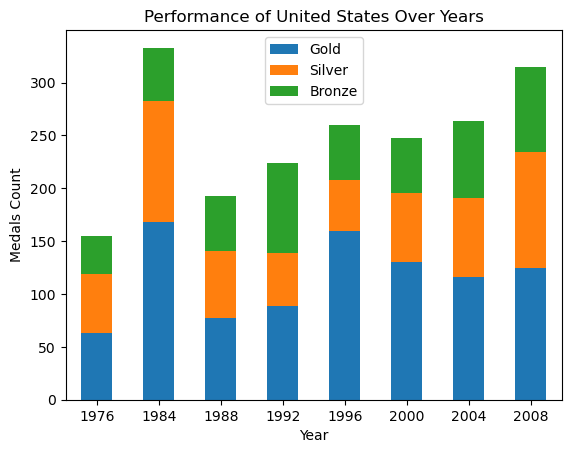

In [444]:
# Input country name (Use from above list)
country_name = input("Enter country: ") 

# Filter the DataFrame for the selected country
country_data = q6_df_year[q6_df_year['Country'] == country_name]

# Check performance over years (total medals per year for the selected country)
performance = country_data.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum()

# Print the performance (optional)
print(performance)

# Plot the performance over years
performance.plot(kind='bar', stacked=True)
plt.title(f"Performance of {country_name} Over Years")
plt.xlabel('Year')
plt.ylabel('Medals Count')
plt.xticks(rotation = 0)
plt.show()

# Q7. Can you tell me which country has dominated any particular sport?

In [417]:
q7_df = df.groupby(['Sport','Country'])['Country'].count().reset_index(name ='Count').sort_values(ascending =[True, False],by =['Sport','Count'])
q7_df

,Sport,Country,Count
43,Aquatics,United States,578
1,Aquatics,Australia,239
28,Aquatics,Russia,125
7,Aquatics,China,118
12,Aquatics,East Germany,109
15,Aquatics,Germany,100
17,Aquatics,Hungary,92
33,Aquatics,Soviet Union,91
6,Aquatics,Canada,89
23,Aquatics,Netherlands,83


In [419]:
q7_df.Sport.unique()

array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

Enter Sport:  Taekwondo


<Figure size 1800x1000 with 0 Axes>

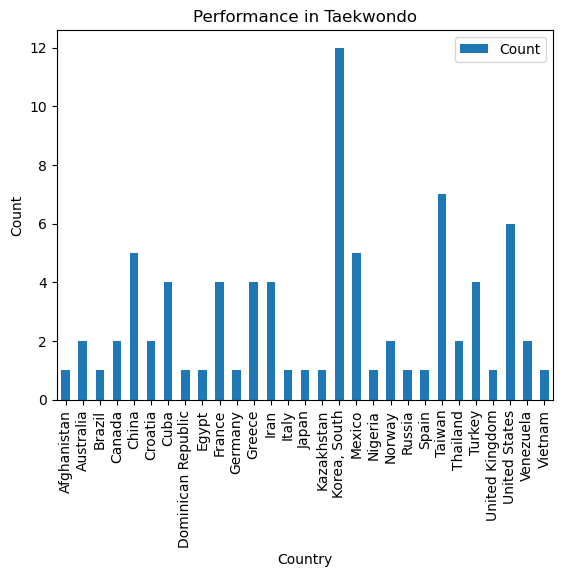

In [433]:
# Input sport name (Use from above list)
sport_name = input("Enter Sport: ") 

# Filter the DataFrame for the selected sport
sport_data = q7_df[q7_df['Sport'] == sport_name]

# Check performance 
performance = sport_data.groupby('Country')[['Count']].sum()

# Print the performance
#print(performance)

# Plot the performance over years
plt.figure(figsize = (18,10))
performance.plot(kind='bar')
plt.title(f"Performance in {sport_name}")
plt.xlabel('Country')
plt.ylabel('Count')
#plt.xticks(rotation = 0)
plt.show()